# TensorFlow2.0教程-过拟合和欠拟合

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


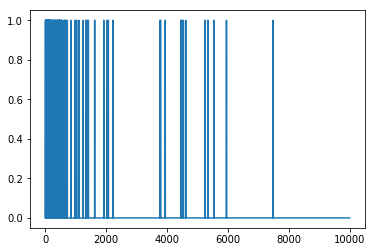

In [8]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)
plt.plot(train_data[0])

防止过度拟合的最简单方法是减小模型的大小，即模型中可学习参数的数量。

深度学习模型往往善于适应训练数据，但真正的挑战是概括，而不是适合。

另一方面，如果网络具有有限的记忆资源，则将不能容易地学习映射。为了最大限度地减少损失，它必须学习具有更强预测能力的压缩表示。同时，如果您使模型太小，则难以适应训练数据。 “太多容量”和“容量不足”之间存在平衡。

要找到合适的模型大小，最好从相对较少的图层和参数开始，然后开始增加图层的大小或添加新图层，直到看到验证损失的收益递减为止。

我们将在电影评论分类网络上使用Dense图层作为基线创建一个简单模型，然后创建更小和更大的版本，并进行比较。

## 1.创建一个baseline模型

In [22]:
import tensorflow.keras.layers as layers
baseline_model = keras.Sequential(
[
    layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [23]:
baseline_history = baseline_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.4808 - accuracy: 0.8096 - binary_crossentropy: 0.4808 - val_loss: 0.3333 - val_accuracy: 0.8762 - val_binary_crossentropy: 0.3333
Epoch 2/20
25000/25000 - 2s - loss: 0.2450 - accuracy: 0.9126 - binary_crossentropy: 0.2450 - val_loss: 0.2831 - val_accuracy: 0.8882 - val_binary_crossentropy: 0.2831
Epoch 3/20
25000/25000 - 2s - loss: 0.1806 - accuracy: 0.9374 - binary_crossentropy: 0.1806 - val_loss: 0.2921 - val_accuracy: 0.8832 - val_binary_crossentropy: 0.2921
Epoch 4/20
25000/25000 - 2s - loss: 0.1450 - accuracy: 0.9511 - binary_crossentropy: 0.1450 - val_loss: 0.3135 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.3135
Epoch 5/20
25000/25000 - 2s - loss: 0.1187 - accuracy: 0.9614 - binary_crossentropy: 0.1187 - val_loss: 0.3406 - val_accuracy: 0.8752 - val_binary_crossentropy: 0.3406
Epoch 6/20
25000/25000 - 2s - loss: 0.1000 - accuracy: 0.9676 - binary_crossentropy: 0.1000 - val_loss: 0.3765

## 2.创建一个小模型

In [24]:
small_model = keras.Sequential(
[
    layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
small_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
small_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [25]:
small_history = small_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6170 - accuracy: 0.6609 - binary_crossentropy: 0.6170 - val_loss: 0.5217 - val_accuracy: 0.8034 - val_binary_crossentropy: 0.5217
Epoch 2/20
25000/25000 - 2s - loss: 0.4356 - accuracy: 0.8661 - binary_crossentropy: 0.4356 - val_loss: 0.3979 - val_accuracy: 0.8781 - val_binary_crossentropy: 0.3979
Epoch 3/20
25000/25000 - 2s - loss: 0.3002 - accuracy: 0.9146 - binary_crossentropy: 0.3002 - val_loss: 0.3160 - val_accuracy: 0.8866 - val_binary_crossentropy: 0.3160
Epoch 4/20
25000/25000 - 2s - loss: 0.2255 - accuracy: 0.9322 - binary_crossentropy: 0.2255 - val_loss: 0.2930 - val_accuracy: 0.8880 - val_binary_crossentropy: 0.2930
Epoch 5/20
25000/25000 - 2s - loss: 0.1884 - accuracy: 0.9416 - binary_crossentropy: 0.1884 - val_loss: 0.2901 - val_accuracy: 0.8858 - val_binary_crossentropy: 0.2901
Epoch 6/20
25000/25000 - 2s - loss: 0.1632 - accuracy: 0.9507 - binary_crossentropy: 0.1632 - val_loss: 0.2918

## 3.创建一个大模型

In [26]:
big_model = keras.Sequential(
[
    layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
big_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
big_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [27]:
big_history = big_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.3523 - accuracy: 0.8466 - binary_crossentropy: 0.3523 - val_loss: 0.2936 - val_accuracy: 0.8808 - val_binary_crossentropy: 0.2936
Epoch 2/20
25000/25000 - 7s - loss: 0.1419 - accuracy: 0.9489 - binary_crossentropy: 0.1419 - val_loss: 0.3197 - val_accuracy: 0.8742 - val_binary_crossentropy: 0.3197
Epoch 3/20
25000/25000 - 7s - loss: 0.0421 - accuracy: 0.9892 - binary_crossentropy: 0.0421 - val_loss: 0.4467 - val_accuracy: 0.8694 - val_binary_crossentropy: 0.4467
Epoch 4/20
25000/25000 - 7s - loss: 0.0054 - accuracy: 0.9994 - binary_crossentropy: 0.0054 - val_loss: 0.5972 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.5972
Epoch 5/20
25000/25000 - 7s - loss: 0.0010 - accuracy: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6727 - val_accuracy: 0.8707 - val_binary_crossentropy: 0.6727
Epoch 6/20
25000/25000 - 6s - loss: 2.6156e-04 - accuracy: 1.0000 - binary_crossentropy: 2.6156e-04 - val_loss

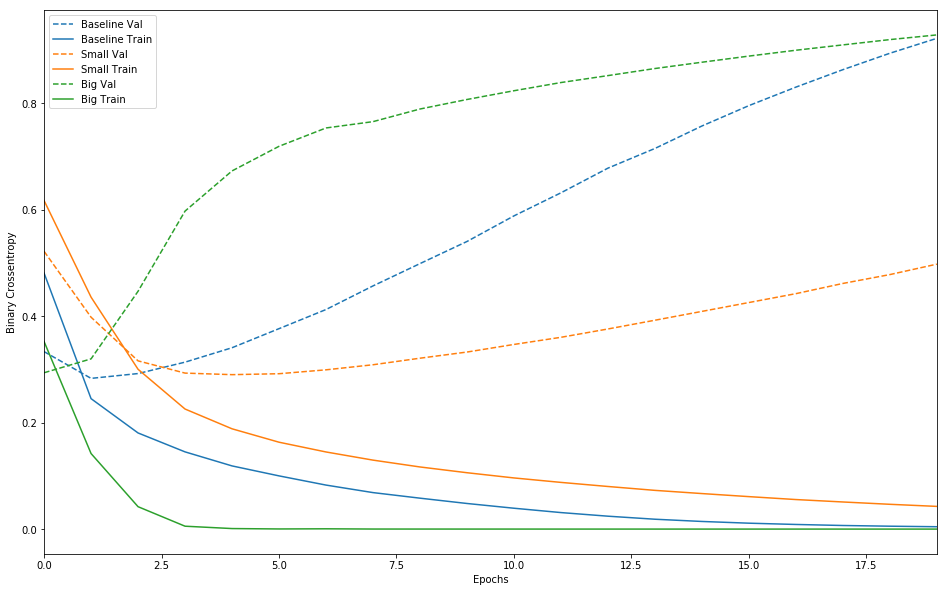

In [28]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('small', small_history),
              ('big', big_history)])

请注意，较大的网络在仅仅一个时期之后几乎立即开始过度拟合，并且更过拟合更严重。 网络容量越大，能够越快地对训练数据进行建模（导致训练损失低），但过度拟合的可能性越大（导致训练和验证损失之间的差异很大）。

## 4.添加l2正则

In [30]:
l2_model = keras.Sequential(
[
    layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), 
                 activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), 
                 activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
l2_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
l2_model.summary()
l2_history = l2_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5264 - accuracy: 0.8019 - binary_crossentropy: 0.4874 - val_loss: 0.3828 - val_accuracy: 0.8769 - val_binary_crossentropy: 0.3415
Epoch 2/20
25000/25000 - 3s - loss: 0.3070 - accuracy: 0.9073 - binary_crossentropy: 0.2607 - val_loss: 0.3356 - val_accuracy: 0.8876 - val_binary_crossentropy:

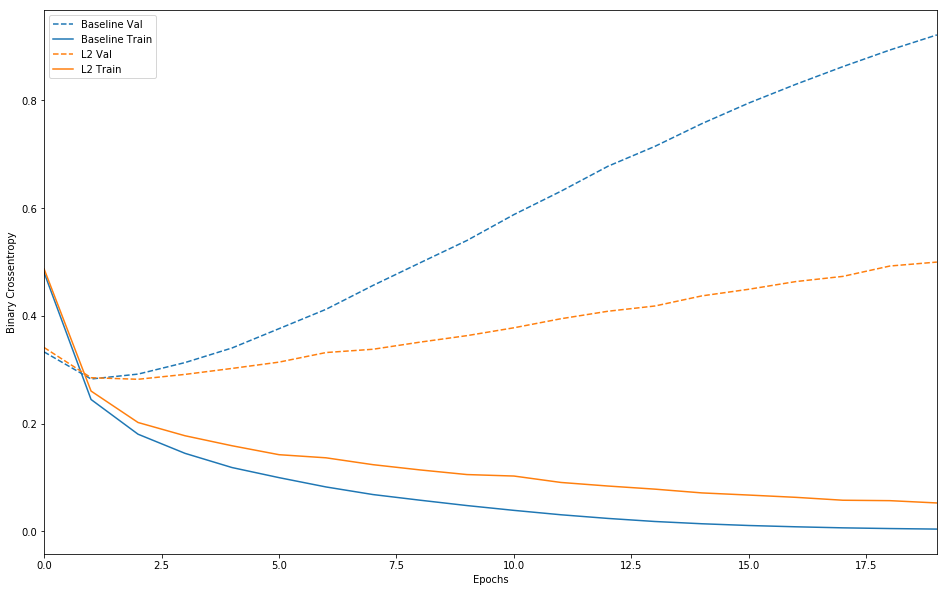

In [32]:
plot_history([('baseline', baseline_history),
              ('l2', l2_history)])

## 5.添加dropout

In [33]:
dpt_model = keras.Sequential(
[
    layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
]
)
dpt_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
dpt_model.summary()
dpt_history = dpt_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6364 - accuracy: 0.6512 -

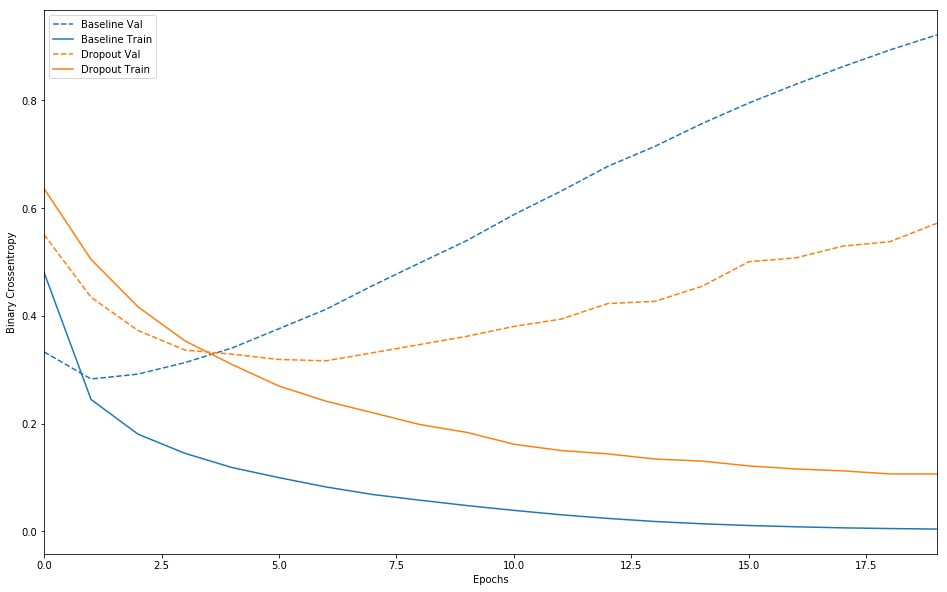

In [34]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_history)])

防止神经网络中过度拟合的最常用方法：

- 获取更多训练数据。
- 减少网络容量。
- 添加权重正规化。
- 添加dropout。